In [0]:
# get text data from url
import urllib.request
urllib.request.urlretrieve("https://www.gutenberg.org/cache/epub/12894/pg12894.txt" , "/tmp/swaroopa.txt")

Out[3]: ('/tmp/swaroopa.txt', <http.client.HTTPMessage at 0x7f4d28754e20>)

In [0]:
# moved file from tmp folder to data folder of dbfs
dbutils.fs.mv("file:/tmp/swaroopa.txt","dbfs:/data/swaroopa.txt")

Out[1]: True

In [0]:
# transfer the data file into Spark
swaroopaRDD= sc.textFile("dbfs:/data/swaroopa.txt")

In [0]:
swaroopaTokensRDD = swaroopaRDD.flatMap(lambda line: line.lower().strip().split(" "))

In [0]:
import re
swaroopaRDD = swaroopaTokensRDD.map(lambda letter: re.sub(r'[^A-Za-z]', '', letter))

In [0]:
# remove stop words
from pyspark.ml.feature import StopWordsRemover
remover = StopWordsRemover()
stopwords = remover.getStopWords()
swaroopaWordsRDD = swaroopaTokensRDD.filter(lambda PointLessW: PointLessW not in stopwords)

In [0]:
# remove empty spaces
swaroopaRemoveRDD = swaroopaWordsRDD.filter(lambda x: x != "")

In [0]:
# map words to immediate keyvlue pairs
swaroopaPairsRDD = swaroopaRemoveRDD.map(lambda word: (word,1))

In [0]:
# tranform pairs to word count
swaroopaWordCountRDD = swaroopaPairsRDD.reduceByKey(lambda acc, value: acc + value)

In [0]:
# sort words in decending order
swaroopaResults = swaroopaWordCountRDD.map(lambda x: (x[1], x[0])).sortByKey(False).take(10)
print(swaroopaResults)

[(898, 'shall'), (698, 'god'), (614, 'o'), (577, 'ye'), (510, 'one'), (501, 'man'), (497, 'like'), (497, 'unto'), (471, 'thou'), (398, 'may')]

Out[14]:

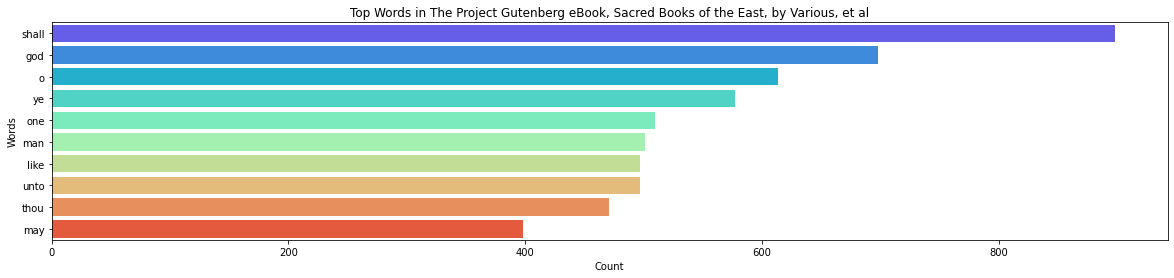

Text(0.5, 1.0, 'Top Words in The Project Gutenberg eBook, Sacred Books of the East, by Various, et al')

In [0]:
# visualize the results
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

source = 'The Project Gutenberg eBook, Sacred Books of the East, by Various, et al'
title = 'Top Words in ' + source
xlabel = 'Count'
ylabel = 'Words'

df = pd.DataFrame.from_records(swaroopaResults, columns =[xlabel, ylabel]) 
plt.figure(figsize=(20,4))
sns.barplot(xlabel, ylabel, data=df, palette="rainbow").set_title(title)